In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from time_series.sources.weather import get_weather_data
df = get_weather_data()

array([<AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>,
       <AxesSubplot:xlabel='Date Time'>, <AxesSubplot:xlabel='Date Time'>],
      dtype=object)

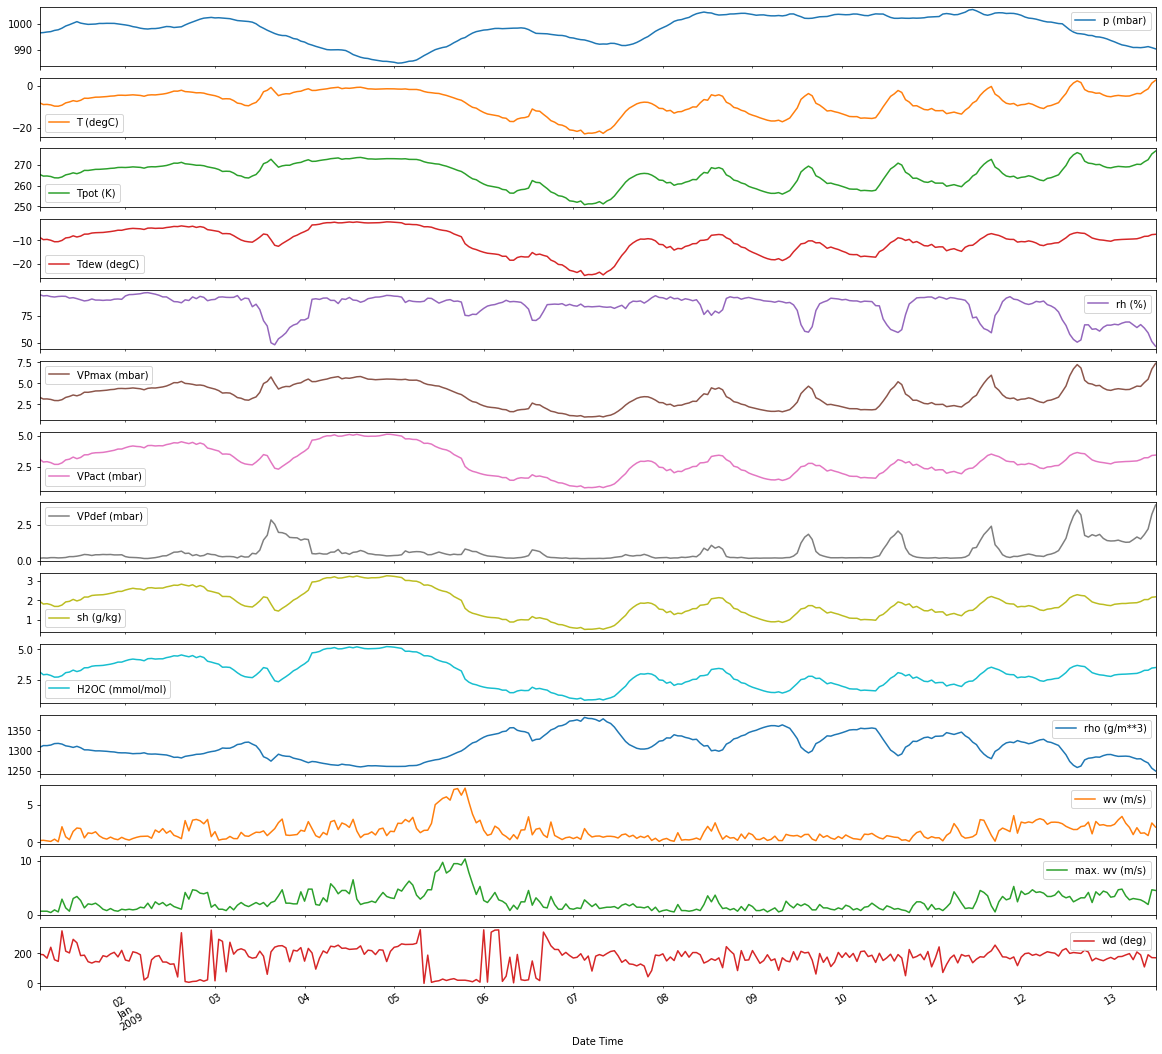

In [3]:
df[:300].plot(subplots=True, figsize=(20,20))

In [4]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,1.702567,2.963041,174.789095
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,65.447512,75.597657,86.619431
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


### Impute values
- Wind velocities shall be positive. 
- So we interpret the value -9999 as missing value and impute it by 0

In [5]:
from pandas import DataFrame
def impute_wind_velocities(df: DataFrame):
    cols = ['wv (m/s)', 'max. wv (m/s)']
    for col in cols:
        mask = df[col] == -9999
        df[col][mask] = 0.0
    return df

In [6]:
df = impute_wind_velocities(df)
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,2.130539,3.533671,174.789095
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,1.543098,2.343417,86.619431
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


###  Detecting periodicity
- This can be done in a systematic way by a fourier analysis. 

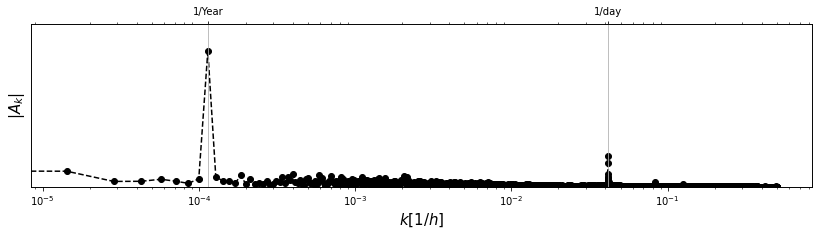

In [7]:
from dataclasses import dataclass
from pandas import Series
from numpy import ndarray

@dataclass
class DFT:
    abs_fourier: float
    frequencies: str



def abs_discrete_fourier(ys: ndarray): 
    N = ys.size
    abs_fourier = tf.abs(tf.signal.rfft(ys))
    frequencies = np.fft.fftfreq(ys.size, d=1)[:N//2+1]
    return DFT(abs_fourier=abs_fourier, frequencies=frequencies)

    
def plot_spectrum(dft: DFT):
    fig, ax = plt.subplots(figsize=(14,3))
    ax.plot(dft.frequencies, dft.abs_fourier,  "--o", color="black")
    ax.set_xscale("log")
    ax.set_xlabel("$k[1/h]$", fontsize=15)
    ax.set_ylabel(r"$\vert A_k\vert$", fontsize=15)
    ax.set_ylim(0,400000)
    ax.set_yticks([])
    # add 1/year and 1/day frequency in hours for visual comparision
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xscale("log")
    ax2.set_xticks([1/(24*365.2524), 1/24.])
    ax2.set_xticklabels(['1/Year', '1/day'])
    ax2.grid([1/(24*365.2524), 1/24.])
    
dft = abs_discrete_fourier(df['T (degC)'])
plot_spectrum(dft)

### Dealing with periodicity

**Temporal periodicty.**
- We have just inspected this. 
**Spacial periodiciy.**
- But we also have spacial periodicity. This comes from the wind direction.  

# Data preparation
- Split train, validation, and test data
- Normalize data

In [8]:
@dataclass
class Data:
    train: DataFrame
    validation: DataFrame
    test: DataFrame
    column_indices: dict
        

def split_data(df: DataFrame):
    column_indices = {name: i for i, name in enumerate(df.columns)}
    num_features = df.shape[1]    
    n = len(df)
    return Data(train=df[0:int(n*0.7)], 
                validation=df[int(n*0.7):int(n*0.9)],
                test=df[int(n*0.9):],
                column_indices=column_indices)

        
def normalize(d: Data):
    mean = d.train.mean()
    std = d.train.std()
    f = lambda df: (df - mean) / std 
    return Data(train=f(d.train), 
                validation=f(d.validation), 
                test=f(d.test), 
                column_indices=d.column_indices)

data = normalize(split_data(df))

# Data windowing

In [15]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

class WindowGenerator:
    def __init__(self, input_width, label_width, shift, label_columns=None):

        # Work out the label column indices.
        self.label_columns = label_columns
        self.input_width = input_width
        self.shift = shift
        self.label_width = label_width
        if label_columns:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}

        # Work out the window parameters.
        self.total_window_size = self.input_width + self.shift
        self.input_slice = slice(0, self.input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])


class SplitWindow:
    def __init__(self, window: WindowGenerator):
        self.window = window
        
    def __call__(self, features: np.ndarray):
        inputs = features[:, self.window.input_slice, :]
        labels = features[:, self.window.labels_slice, :]
        if self.window.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.window.label_columns_indices[name]] for name in self.window.label_columns],
                axis=-1)
        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.window.input_width, None])
        labels.set_shape([None, self.window.label_width, None])
        return inputs, labels


class MakeDataset:
    
    def __init__(self, sequence_length, fn):
        self.sequence_length = sequence_length
        self.fn = fn
        
    
    def __call__(self, df: DataFrame):
          data = np.array(df, dtype=np.float32)
          ds = timeseries_dataset_from_array(
              data=data,
              targets=None,
              sequence_length=self.sequence_length,
              sequence_stride=1,
              shuffle=True,
              batch_size=32,)
          return ds.map(self.fn)

In [49]:
# Example how to use it
window = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['T (degC)'])
make_dataset = MakeDataset(window.total_window_size, SplitWindow(window))
train_generator = make_dataset(data.train)
for example_inputs, example_labels in train_generator.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 24, 14)
Labels shape (batch, time, features): (32, 1, 1)


# Baseline model in tensorflow (naive method)

In [53]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [60]:
baseline = Baseline(label_index=data.column_indices['T (degC)'])
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])
window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=['T (degC)'])
make_dataset = MakeDataset(window.total_window_size, SplitWindow(window))
val_performance = {}
val_performance['Baseline'] = baseline.evaluate(make_dataset(data.validation))
performance = {}
performance['Baseline'] = baseline.evaluate(make_dataset(data.test), verbose=0)

439/439 [==============================] - 1s 2ms/step - loss: 1.9633 - mean_absolute_error: 1.1478
